In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

from pylab import plot, show
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score
import statsmodels.api as sm

### Bike Sharing Prediction Using Multiple Linear Regression

In [2]:
bike = pd.read_csv("dataset/bikesharing.csv")

In [3]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
bike.shape

(17379, 17)

In [5]:
bike.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


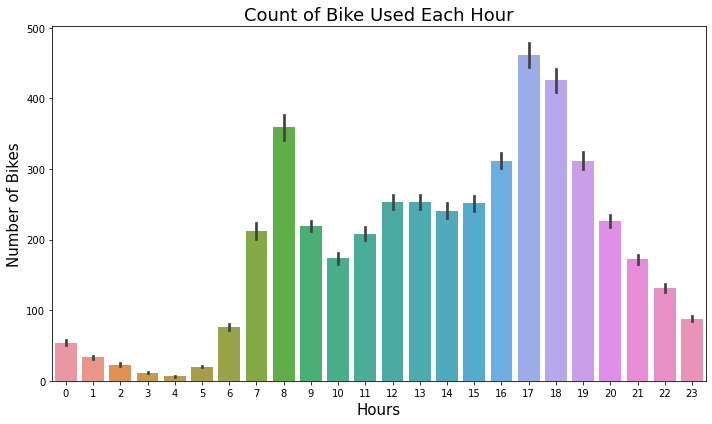

In [6]:
plt.figure(figsize=(10,6))
# make barplot
sns.barplot(x='hr', y="cnt", data=bike)
# set labels
plt.xlabel("Hours", size=15)
plt.ylabel("Number of Bikes", size=15)
plt.title("Count of Bike Used Each Hour", size=18)
plt.tight_layout()
#plt.savefig("barplot_Seaborn_Python.png", dpi=100)

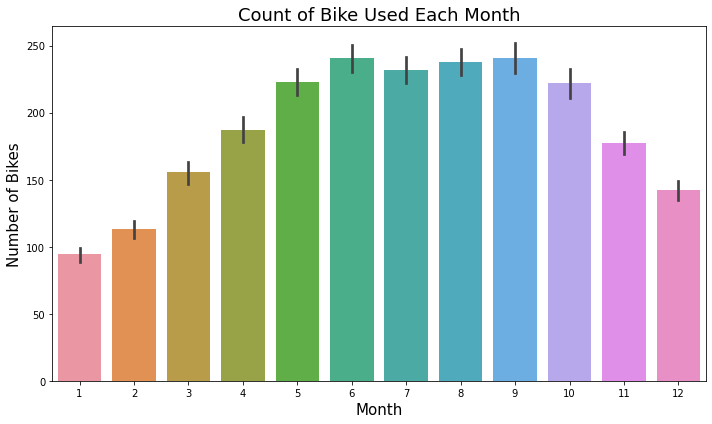

In [7]:
plt.figure(figsize=(10,6))
# make barplot
sns.barplot(x='mnth', y="cnt", data=bike)
# set labels
plt.xlabel("Month", size=15)
plt.ylabel("Number of Bikes", size=15)
plt.title("Count of Bike Used Each Month", size=18)
plt.tight_layout()
#plt.savefig("barplot_Seaborn_Python.png", dpi=100)

Drop "dteday" column because this cannot be used to make predictions into the future.
Drop columns "casual" and "registers" as these sum up to the count "cnt" and cannot be known into the future.
Drop "cnt" as that is the dependent variable

In [8]:
## getting column names
x_columns = ["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit",
             "temp", "atemp", "hum", "windspeed"]
y = bike["cnt"]

### Ordinary Least Square (Stepwise)

In [9]:
def get_stats():
    x = bike[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.707
Method:                 Least Squares   F-statistic:                              3501.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):                        0.00
Time:                        22:04:57   Log-Likelihood:                     -1.1077e+05
No. Observations:               17379   AIC:                                  2.216e+05
Df Residuals:                   17367   BIC:                                  2.217e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Remove features which are not statistically significant namely mnth, workingday, weathersit, and windspeed

In [10]:
x_columns.remove('mnth')
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.707
Method:                 Least Squares   F-statistic:                              3819.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):                        0.00
Time:                        22:04:57   Log-Likelihood:                     -1.1077e+05
No. Observations:               17379   AIC:                                  2.216e+05
Df Residuals:                   17368   BIC:                                  2.216e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [11]:
x_columns.remove('workingday')
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                    cnt   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.707
Method:                 Least Squares   F-statistic:                              4201.
Date:                Mon, 12 Apr 2021   Prob (F-statistic):                        0.00
Time:                        22:04:57   Log-Likelihood:                     -1.1077e+05
No. Observations:               17379   AIC:                                  2.216e+05
Df Residuals:                   17369   BIC:                                  2.216e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
x = bike[x_columns]

In [13]:
### Train Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=7)

In [14]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [15]:
print('Coefficients: \n', linear_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((linear_model.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linear_model.score(X_test, y_test))

Coefficients: 
 [  19.42901536   80.63536185    7.74392286  -22.97390065    2.2239787
   -2.51047978  100.7202737   211.20120678 -196.33398486   27.99051949]
Mean squared error: 20869.31
Variance score: 0.38


In [16]:
y_pred = linear_model.predict(X_test)

In [19]:
r2 = r2_score(y_test, y_pred)

In [20]:
print('R Square on model: %.2f' % r2)

R Square on model: 0.38
